# 데이터 불러오기 및 데이터 확인

In [ ]:
! git clone https://github.com/LeeHuiJong/SkillTreePython-DataAnalysis

Cloning into 'SkillTreePython-DataAnalysis'...
remote: Enumerating objects: 962, done.
remote: Counting objects: 100% (297/297), done.
remote: Compressing objects: 100% (128/128), done.
remote: Total 962 (delta 176), reused 281 (delta 165), pack-reused 665
Receiving objects: 100% (962/962), 37.57 MiB | 19.52 MiB/s, done.
Resolving deltas: 100% (517/517), done.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import random as rn
import os

In [ ]:
train = pd.read_csv('/content/SkillTreePython-DataAnalysis/05.머신러닝기반데이터분석/data/지점매출 데이터/train.csv')
test = pd.read_csv('/content/SkillTreePython-DataAnalysis/05.머신러닝기반데이터분석/data/지점매출 데이터/test.csv')

In [ ]:
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,14/09/2012,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20


In [ ]:
test

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday
0,1,1,05/10/2012,68.55,3.617,8077.89,NaN,18.22,3617.43,3626.14,6.573,False
1,2,1,12/10/2012,62.99,3.601,2086.18,NaN,8.11,602.36,5926.45,6.573,False
2,3,1,19/10/2012,67.97,3.594,950.33,NaN,4.93,80.25,2312.85,6.573,False
3,4,1,26/10/2012,69.16,3.506,2585.85,31.75,6.00,1057.16,1305.01,6.573,False
4,5,2,05/10/2012,70.27,3.617,6037.76,NaN,10.04,3027.37,3853.40,6.170,False
...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,44,26/10/2012,46.97,3.755,38.65,2.61,0.98,NaN,457.74,5.217,False
176,177,45,05/10/2012,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,8.667,False
177,178,45,12/10/2012,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,8.667,False
178,179,45,19/10/2012,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,8.667,False


In [ ]:
len(train.columns) # 컬럼은 id와 target을 제외하면 총 11개다

13

In [ ]:
train.isnull().sum() # 결측치가 promotion 컬럼에 걸쳐 상당수 분포 되어있음

id                 0
Store              0
Date               0
Temperature        0
Fuel_Price         0
Promotion1      4153
Promotion2      4663
Promotion3      4370
Promotion4      4436
Promotion5      4140
Unemployment       0
IsHoliday          0
Weekly_Sales       0
dtype: int64

# 라벨(Weekly_Sales)

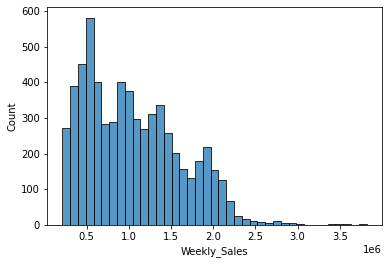

In [ ]:
sns.histplot(train['Weekly_Sales']) # 데이터가 어느정도 고르게 분포되어 있는것으로 보인다.

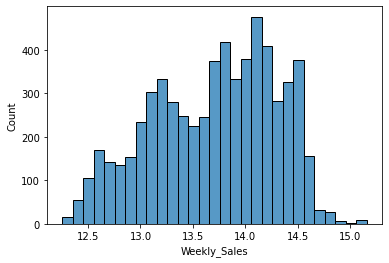

In [ ]:
sns.histplot(np.log(train['Weekly_Sales'])) # 로그 스케일링을 하니 정규분포에 가까워짐, 로그 스케일을 하면 예측이 더 정확해질것으로 판단됨

In [ ]:
train['Store'].value_counts(sort = False) # 각 지점별로 139개의 샘플이 동일하게 분포되어 있음

1     139
2     139
3     139
4     139
5     139
6     139
7     139
8     139
9     139
10    139
11    139
12    139
13    139
14    139
15    139
16    139
17    139
18    139
19    139
20    139
21    139
22    139
23    139
24    139
25    139
26    139
27    139
28    139
29    139
30    139
31    139
32    139
33    139
34    139
35    139
36    139
37    139
38    139
39    139
40    139
41    139
42    139
43    139
44    139
45    139
Name: Store, dtype: int64

In [ ]:
# 코드 예시, 살펴볼것
# brand_list = train[['brand', 'target']].groupby(['brand'], as_index=False).mean().sort_values(by='target', ascending=True,ignore_index=True)
# brand_list

In [ ]:
2107607.30/259675.20

8.116321081104394

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
dm = train.groupby('Store')['Weekly_Sales'].agg(**{'mean_Weekly_Sales':'mean'}).sort_values("mean_Weekly_Sales", ascending=False)
dm # 각 매장에 따른 평균 매출을 매겨보니 최대 매출과 최저 매출인 매장간의 격차가 상당히 컸다.(약 8배 차이)

,mean_Weekly_Sales
Store,
20,2107607.30
4,2093195.90
14,2031497.13
13,2003046.80
2,1926625.37
10,1904069.56
27,1778997.10
6,1567699.61
1,1555087.92


# 휴일(IsHoliday)

In [ ]:
len(train[train['IsHoliday']==1])

450

In [ ]:
len(train[train['IsHoliday']==0])

5805

In [ ]:
len(train)

6255

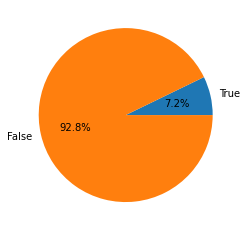

In [ ]:
import matplotlib.pyplot as plt

Total_counts = len(train)
True_counts = len(train[train['IsHoliday']==1])
False_counts = len(train[train['IsHoliday']==0])


ratio = [True_counts/Total_counts, False_counts/Total_counts]
labels = ['True', 'False']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()
# 휴일이 있는 주의 비율이 전체 데이터의 7.2퍼센트다.

# 지점(Store)

In [ ]:
# train셋 날짜 분리
# Date에 날짜형식 적용(원래는 object 형식)
train['Date'] = pd.to_datetime(train['Date'], format="%d/%m/%Y")

# Date 컬럼 year, month, day, week 로 분리
train['year'] =train['Date'].dt.year
train['month'] =train['Date'].dt.month
train['day'] =train['Date'].dt.day
train['week'] =train['Date'].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



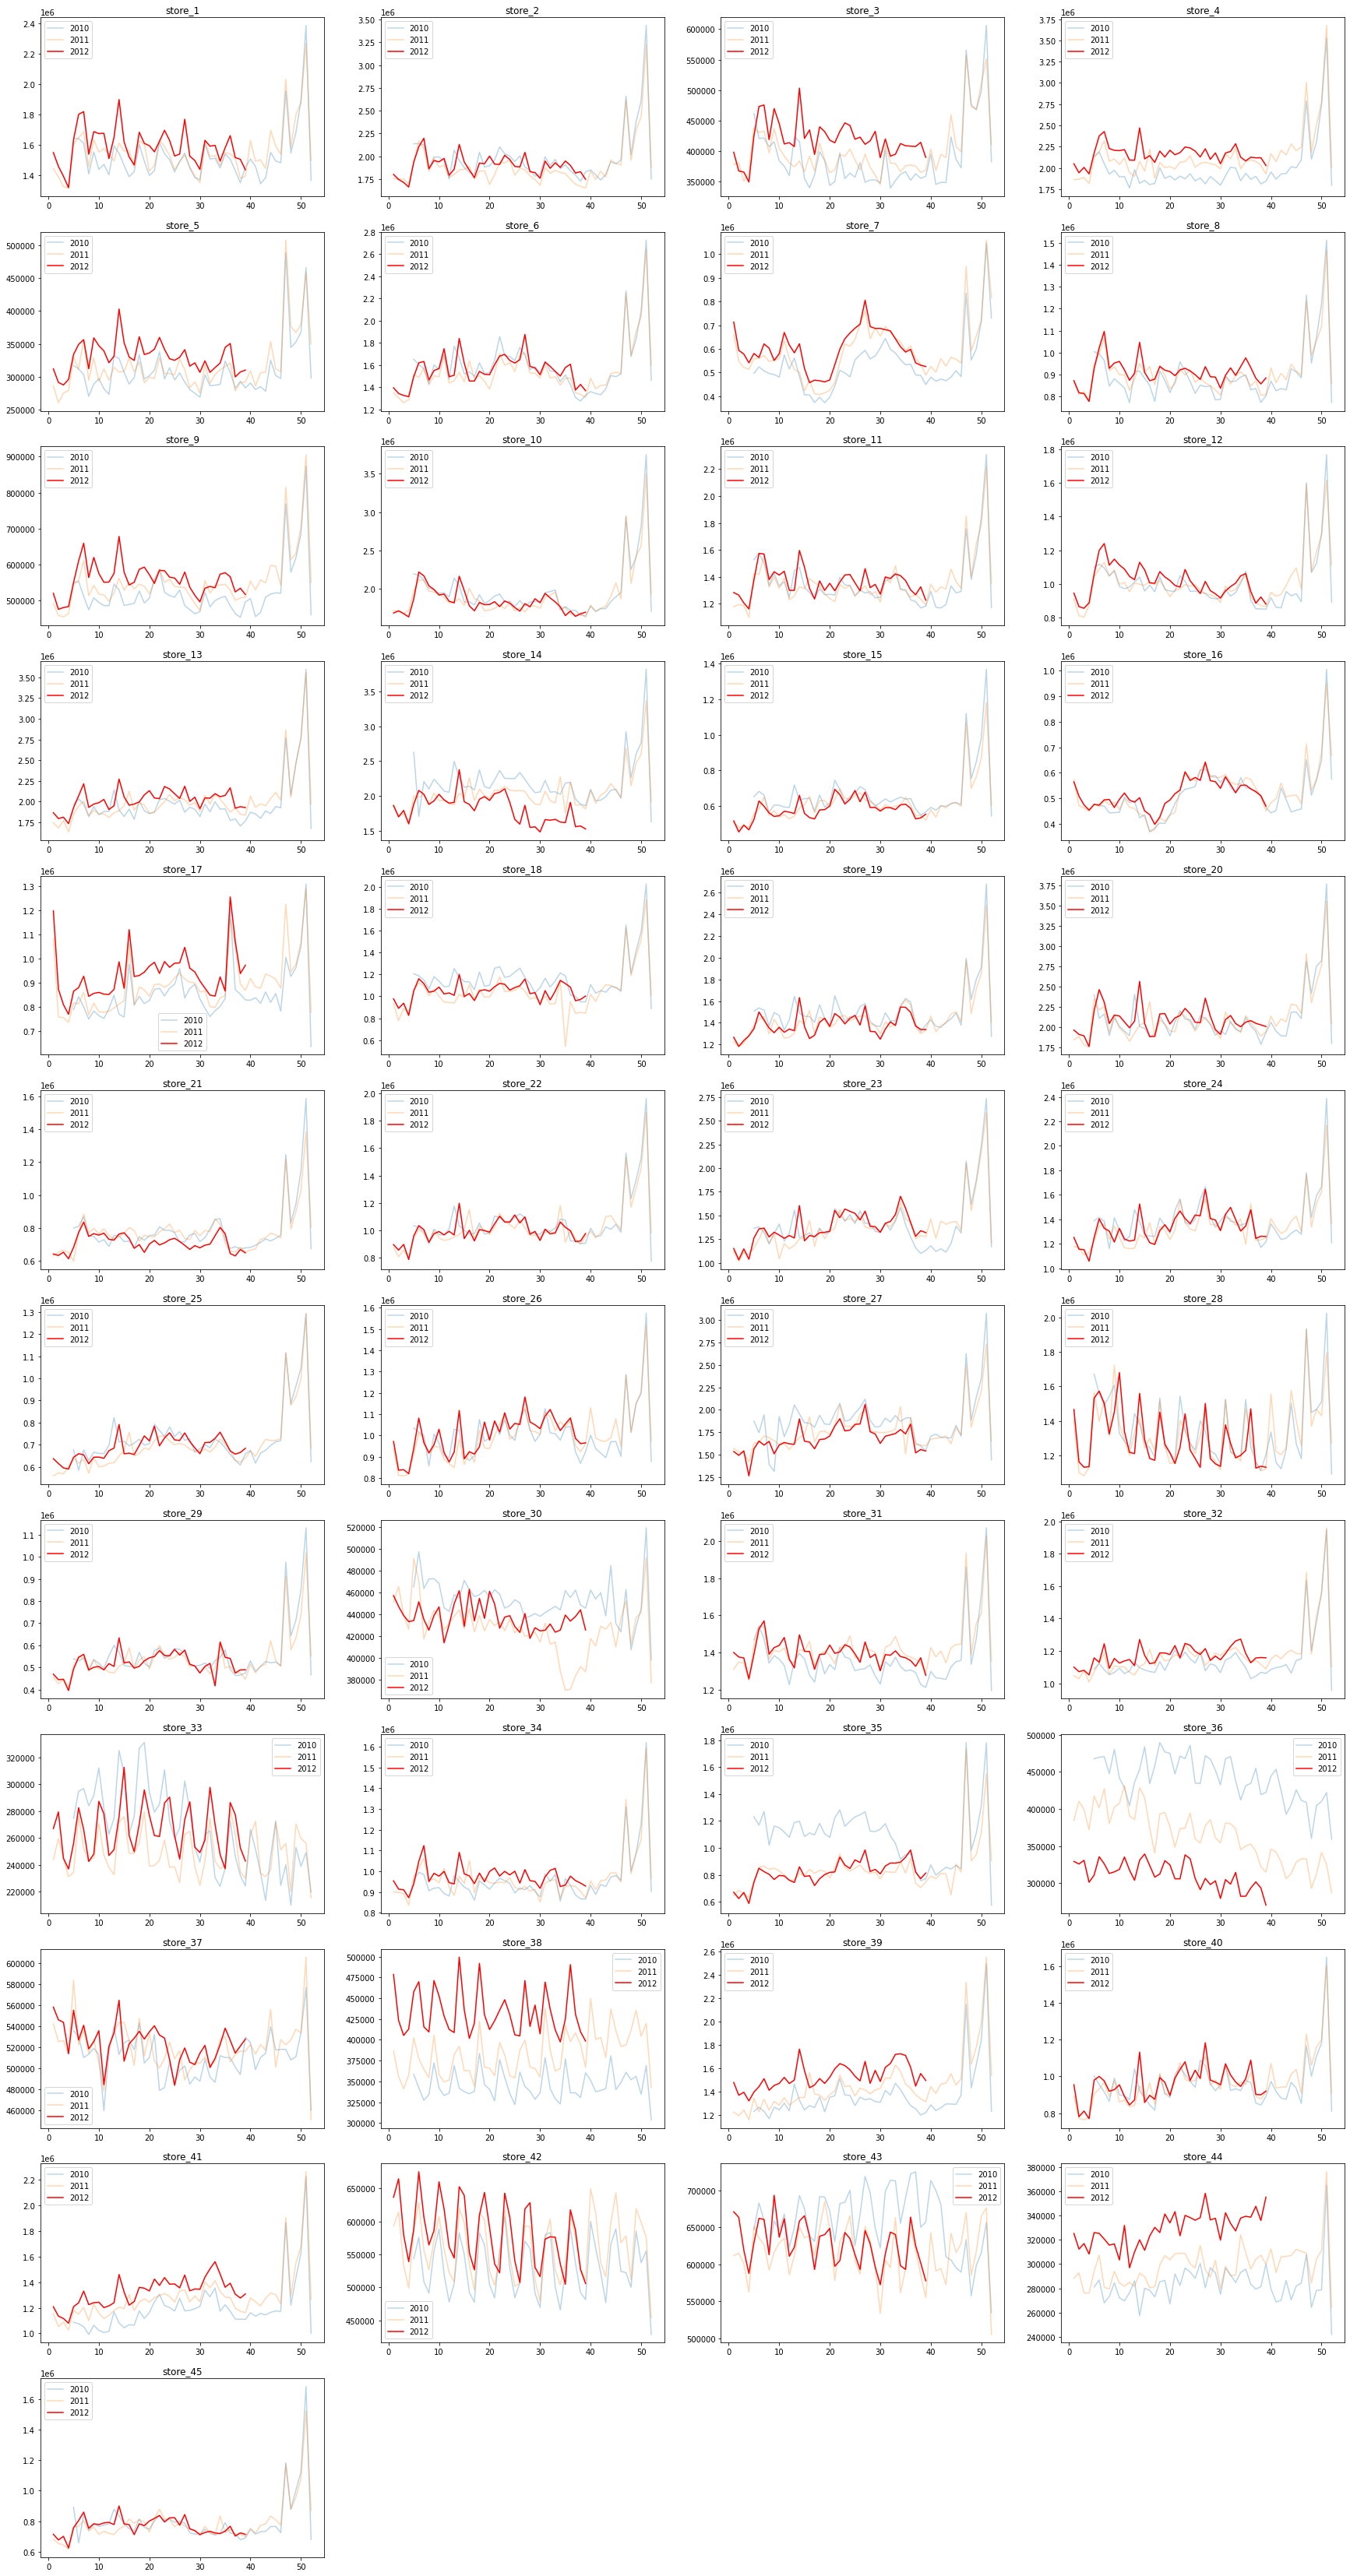

In [ ]:
fig = plt.figure(figsize=(30,60))

for store in range(1,max(train.Store)+1):
    storeset = train[train.Store==store]
    storeset_2010 = storeset[storeset.year==2010]
    storeset_2011 = storeset[storeset.year==2011]
    storeset_2012 = storeset[storeset.year==2012]
    
    ax = fig.add_subplot(12, 4, store)
    
    plt.title(f"store_{store}")
    ax.plot(storeset_2010.week, storeset_2010.Weekly_Sales, label="2010", alpha=0.3)
    ax.plot(storeset_2011.week, storeset_2011.Weekly_Sales, label="2011", alpha=0.3)
    ax.plot(storeset_2012.week, storeset_2012.Weekly_Sales, label="2012", color='r')
    ax.legend()
    
plt.show()

# 프로모션(Promotion)

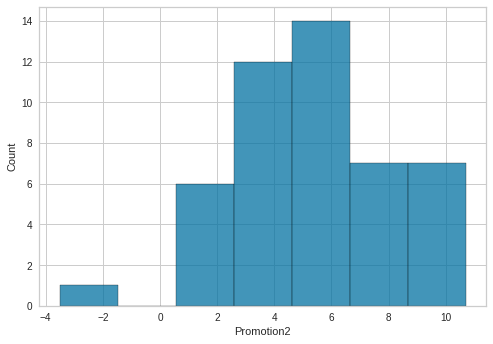

In [ ]:
sns.histplot(np.log(train['Promotion2']))

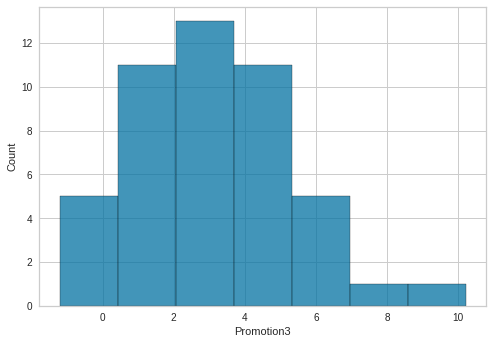

In [ ]:
sns.histplot(np.log(train['Promotion3']))

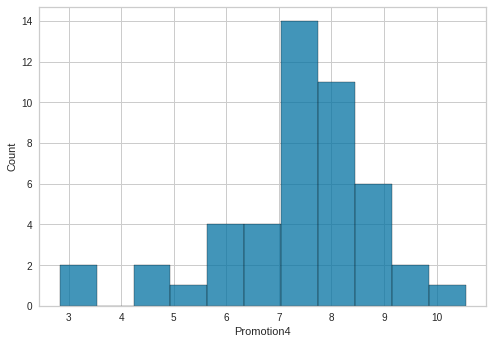

In [ ]:
sns.histplot(np.log(train['Promotion4']))

# 온도(Temperature), 연료(Fuel_Price), 실업율(Unemployment)

In [ ]:
nums = ['Temperature', 'Fuel_Price', 'Unemployment']

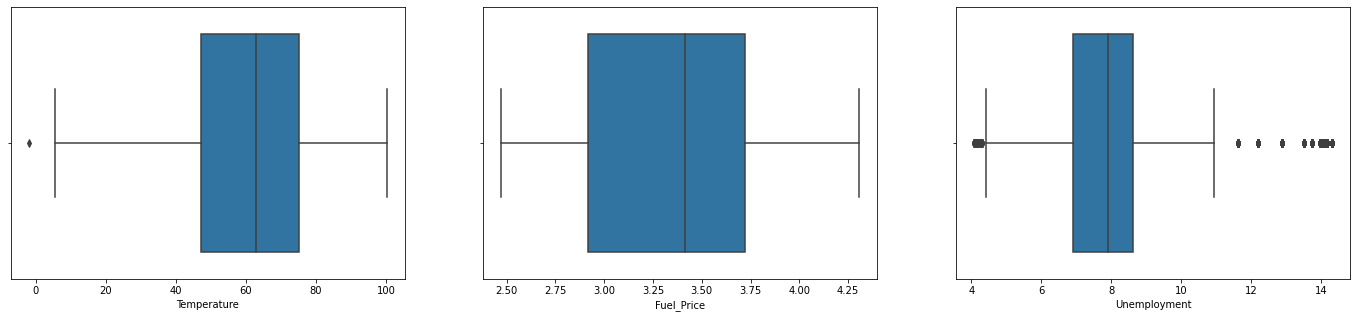

In [ ]:
f, axes = plt.subplots(1,len(nums), figsize=(24,5))
axes = axes.flatten()                         
for col, ax in zip(nums, axes):
  sns.boxplot(data = train, x=col, ax=ax)
plt.show()

In [ ]:
train[train['Unemployment']<4.5]

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
530,531,4,06/04/2012,67.69,3.864,11341.17,NaN,73.38,5677.89,7821.95,4.308,False,2470206.13
531,532,4,13/04/2012,68.69,3.881,12506.74,5941.43,30.84,3915.29,4392.95,4.308,False,2105301.39
532,533,4,20/04/2012,68.60,3.864,2774.39,4279.41,43.43,2409.97,4544.22,4.308,False,2144336.89
533,534,4,27/04/2012,76.47,3.810,3993.66,97.77,26.68,113.37,3947.45,4.308,False,2064065.66
534,535,4,04/05/2012,80.14,3.747,13737.91,NaN,93.65,6993.97,4541.89,4.308,False,2196968.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5555,5556,40,31/08/2012,66.11,3.884,10904.29,38.81,23.95,2684.17,2912.76,4.156,False,987264.67
5556,5557,40,07/09/2012,65.06,3.921,5494.10,NaN,39.66,925.80,3268.99,4.156,True,1088248.40
5557,5558,40,14/09/2012,59.38,3.988,5593.11,NaN,62.88,290.65,7375.04,4.156,False,901709.82
5558,5559,40,21/09/2012,54.12,4.056,3688.63,7.64,NaN,693.23,4870.36,4.156,False,899768.40


### Observation
- 상당히 많은 이상치가 unemployment에 있는것으로 보인다. 이것을 어떻게 처리할지 생각해보기


# 변수간 상관관계

In [ ]:
train.corr().style.background_gradient(cmap ='coolwarm')

,id,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,year,month,day,proper
id,1.000000,0.999753,-0.019554,0.075666,0.118223,0.052896,0.026290,0.077563,0.120643,0.218548,0.000000,-0.335276,0.020889,0.002183,0.000991,-0.001544
Store,0.999753,1.000000,-0.022895,0.058628,0.116463,0.052340,0.026069,0.076432,0.118973,0.223808,0.000000,-0.335569,0.000000,0.000000,0.000000,-0.003340
Temperature,-0.019554,-0.022895,1.000000,0.148054,-0.009220,-0.033920,-0.009728,-0.011952,-0.016826,0.102688,-0.155595,-0.063231,0.064404,0.239648,0.029341,0.361369
Fuel_Price,0.075666,0.058628,0.148054,1.000000,0.059635,0.013044,0.005042,0.037109,0.049484,-0.025728,-0.071485,0.010986,0.774803,-0.079281,0.030803,-0.011027
Promotion1,0.118223,0.116463,-0.009220,0.059635,1.000000,0.244260,0.016213,0.808366,0.625446,0.019161,-0.000161,-0.032478,0.082759,-0.010691,-0.021726,0.010755
Promotion2,0.052896,0.052340,-0.033920,0.013044,0.244260,1.000000,0.015938,0.158090,0.279242,0.007317,0.033573,-0.014210,0.027990,-0.009399,0.005045,-0.011099
Promotion3,0.026290,0.026069,-0.009728,0.005042,0.016213,0.015938,1.000000,0.006508,0.064412,0.004078,0.045091,0.002977,0.002118,0.021739,0.013588,-0.005430
Promotion4,0.077563,0.076432,-0.011952,0.037109,0.808366,0.158090,0.006508,1.000000,0.431158,0.012099,-0.004364,-0.021910,0.057880,-0.019801,-0.022685,0.008657
Promotion5,0.120643,0.118973,-0.016826,0.049484,0.625446,0.279242,0.064412,0.431158,1.000000,0.019303,-0.007677,-0.030988,0.073766,0.003171,-0.012010,-0.002610
Unemployment,0.218548,0.223808,0.102688,-0.025728,0.019161,0.007317,0.004078,0.012099,0.019303,1.000000,0.006667,-0.107331,-0.229912,0.005010,-0.004680,-0.024471
